# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1026]:
!pip install imbalanced-learn


In [1027]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1028]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [1029]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4/bank_transactions_data_2.csv')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Memahami Struktur Data

In [1030]:
print("Jumlah baris:", df.shape)

Jumlah baris: (2512, 16)


In [1031]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [1032]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [1033]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Insight:
1. Fitur Numerik:

  * TransactionAmount bervariasi luas (min 0.2, max 1919.1), ada kemungkinan outlier.

  * CustomerAge mayoritas di 45-50 tahun.

  * LoginAttempts median 1, tapi ada yang hingga 5 kali (indikasi aktivitas mencurigakan?).

  * AccountBalance median 4,735.51, dengan rentang luas.

2. Fitur Kategorikal:

  * TransactionType, Location, DeviceID → Bisa digunakan untuk pola transaksi.

  * MerchantID & Channel → Bisa dianalisis untuk metode transaksi populer.

  * PreviousTransactionDate → Bisa dihitung untuk melihat frekuensi transaksi pelanggan.

3. Potensi Analisis:

  * Deteksi anomali untuk transaksi mencurigakan.

  * Segmentasi pelanggan berdasarkan saldo dan perilaku transaksi.

  * Fraud detection dengan melihat pola login dan durasi transaksi.

## 4.2. Menangani Data yang Hilang

In [1034]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## 4.3. Analisis Distribusi dan Korelasi

In [1035]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


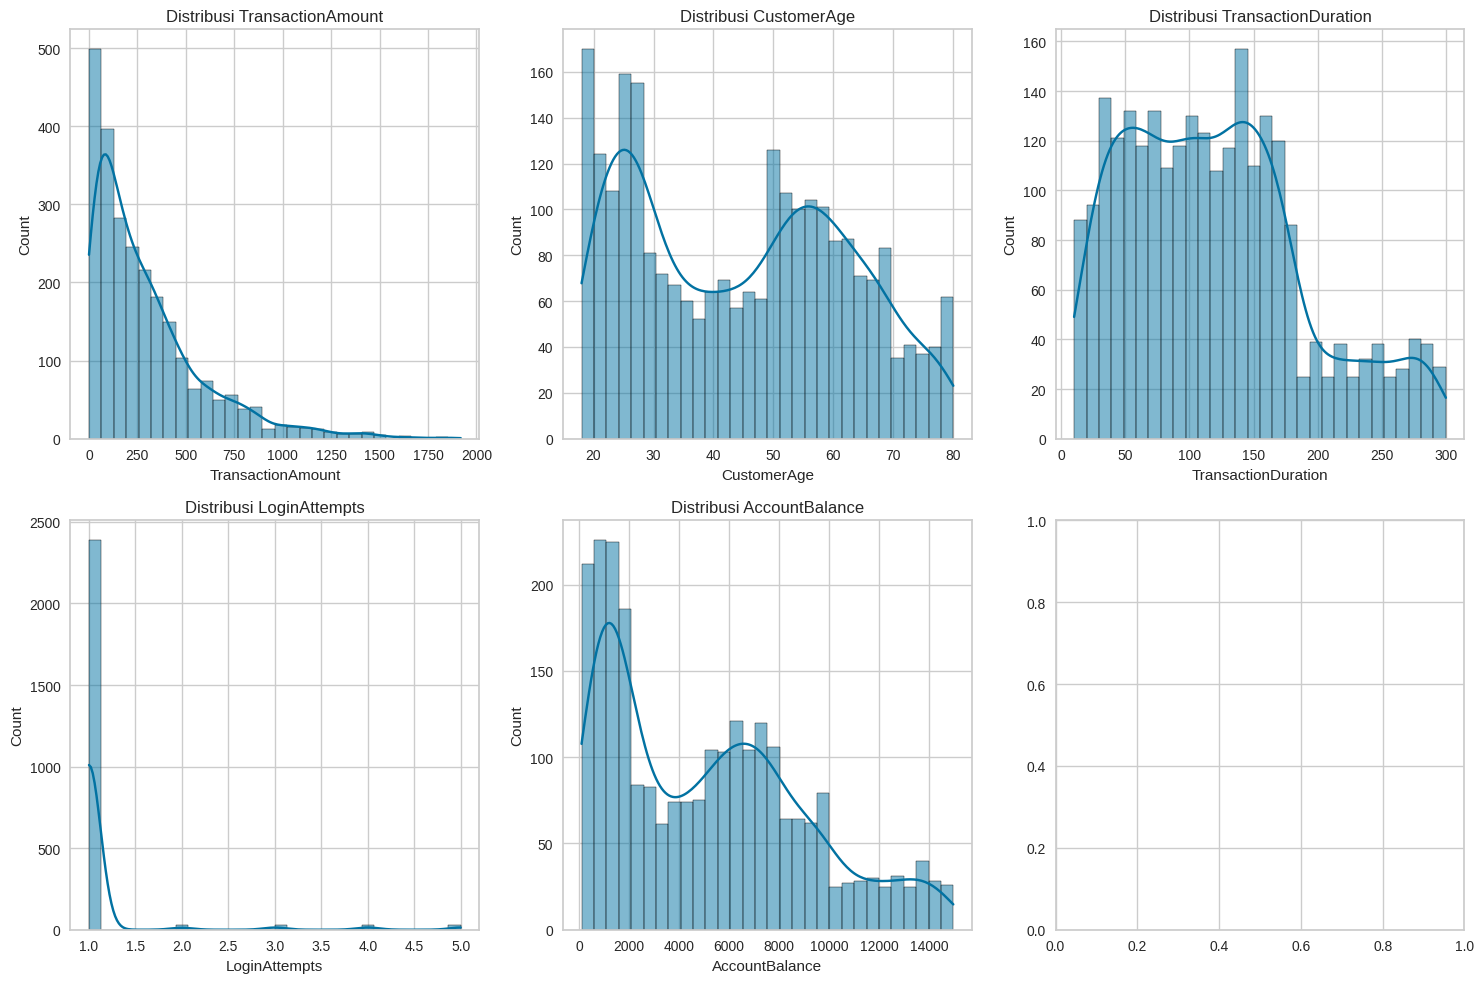

In [1036]:
numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

## 4.4. Visualisasi Data

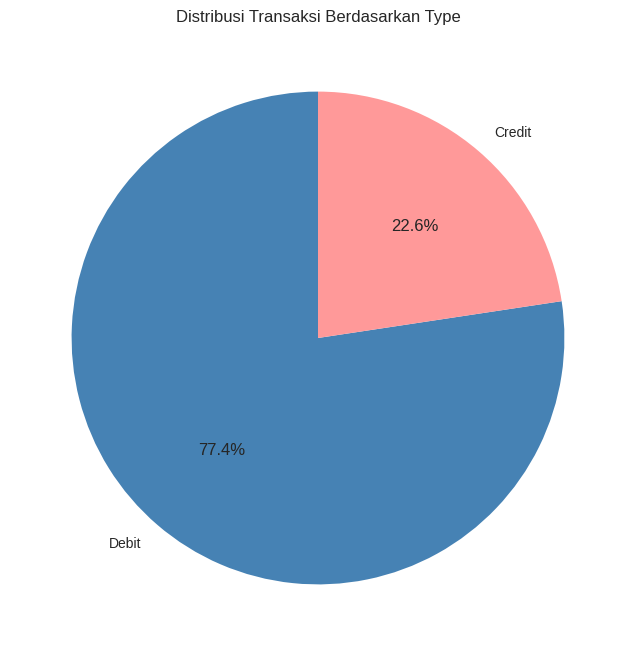

In [1037]:
# Menghitung distribusi kategori transaksi
type_counts = df["TransactionType"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=["#4682B4", "#ff9999"], startangle=90)

plt.title("Distribusi Transaksi Berdasarkan Type")
plt.show()

<ipython-input-1038-f0e9dbac9aba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


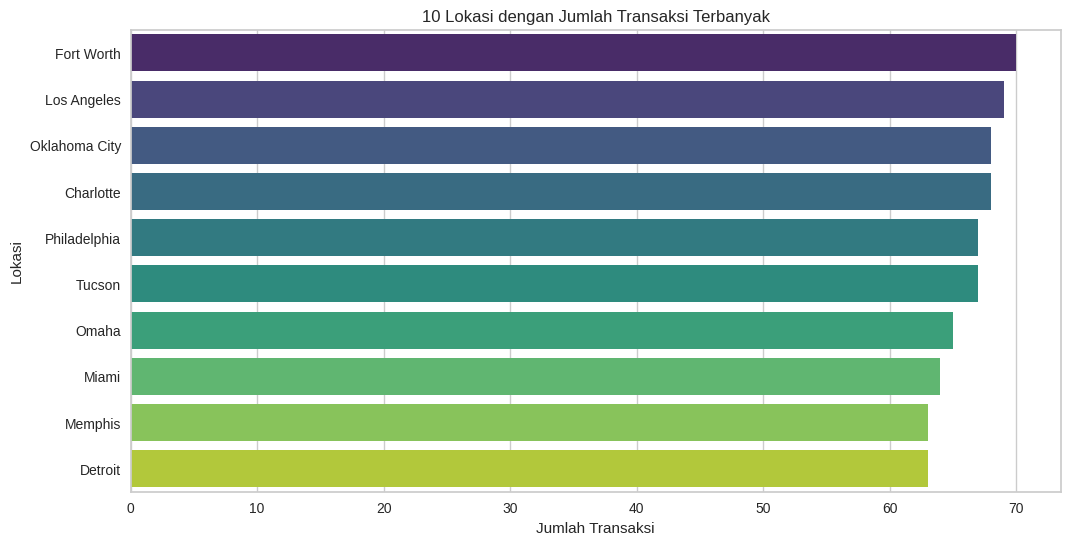

In [1038]:
top_locations = df["Location"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Lokasi")
plt.title("10 Lokasi dengan Jumlah Transaksi Terbanyak")
plt.show()

<ipython-input-1039-4df348d1e31c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette="coolwarm")


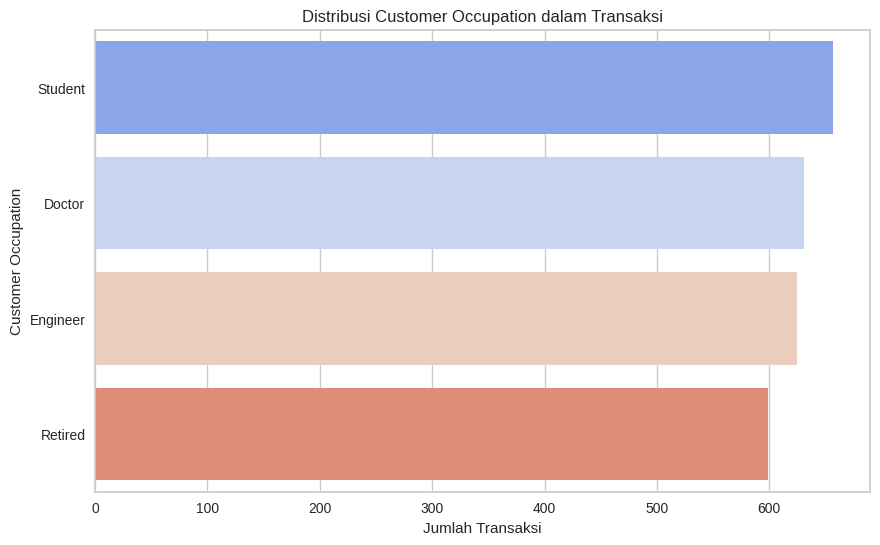

In [1039]:
occupation_counts = df["CustomerOccupation"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette="coolwarm")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Customer Occupation")
plt.title("Distribusi Customer Occupation dalam Transaksi")
plt.show()

<ipython-input-1040-bb8c6a7bfd5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="coolwarm")


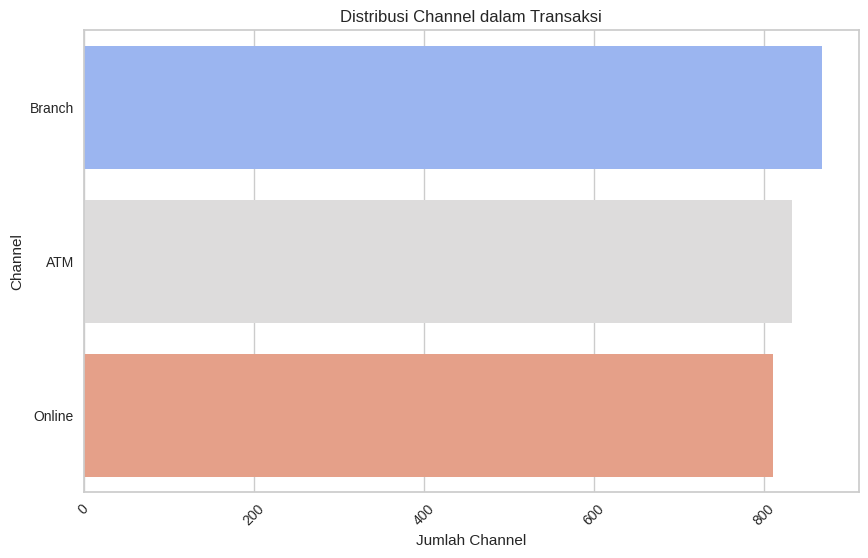

In [1040]:
channel_counts = df["Channel"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="coolwarm")
plt.xlabel("Jumlah Channel")
plt.ylabel("Channel")
plt.title("Distribusi Channel dalam Transaksi")
plt.xticks(rotation=45)
plt.show()

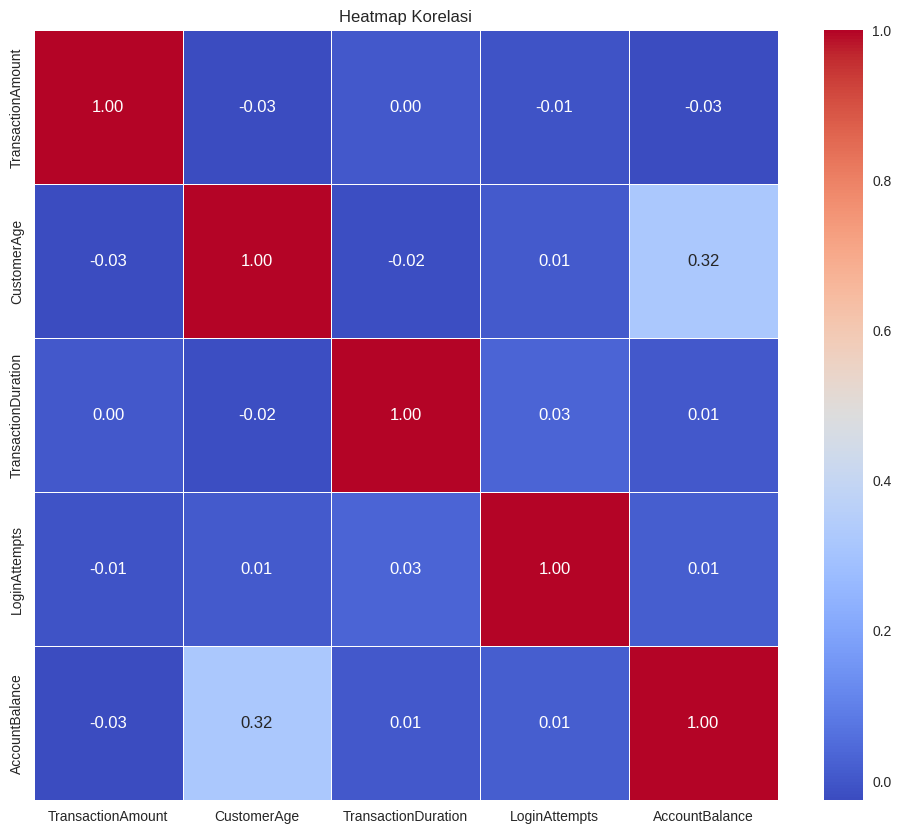

In [1041]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 5.1. Menghapus atau menangani data kosong (missing values)

In [1042]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


## 5.2. Menghapus Data Duplikat

In [1043]:
df.duplicated().sum()

np.int64(0)

## 5.3. Deteksi dan Penanganan Outlier

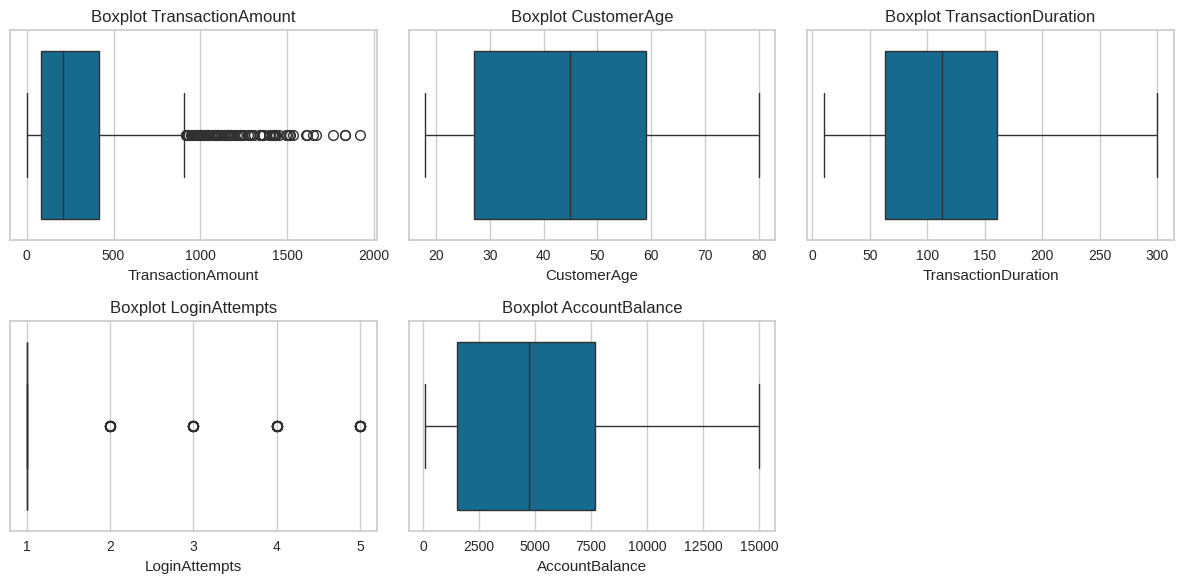

In [1044]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

In [1045]:
drop_columns = ["TransactionID", "AccountID", "IP Address", "DeviceID", "MerchantID"]
df_cleaned = df.drop(columns=drop_columns)

In [1046]:
categorical_cols = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


In [1047]:
numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

In [1048]:
df_processed = pd.concat([scaled_df, encoded_df], axis=1)

In [1049]:
df_processed.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.269440,1.311287,0.305314,-0.206794,2.216472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1050]:

X = df.iloc[:, [2, 13]].values

print(pd.DataFrame(X, columns=['TransactionAmount', 'Login Attempts']))

      TransactionAmount  Login Attempts
0                 14.09             1.0
1                376.24             1.0
2                126.29             1.0
3                184.50             1.0
4                 13.45             1.0
...                 ...             ...
2507             856.21             1.0
2508             251.54             1.0
2509              28.63             1.0
2510             185.97             1.0
2511             243.08             1.0

[2512 rows x 2 columns]


In [1051]:
# menggunakan SelectKBest
k_best = SelectKBest(score_func=f_classif, k=10)
df_selected = k_best.fit_transform(df_processed, df_cleaned['TransactionAmount'])
selected_features = df_processed.columns[k_best.get_support()]
df_selected = pd.DataFrame(df_selected, columns=selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [1052]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=5)  # Mengambil 5 komponen utama
df_pca = pca.fit_transform(df_selected)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(5)])

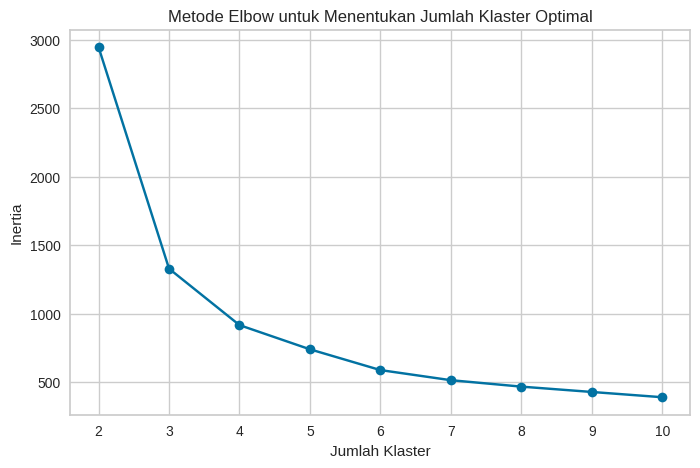

In [1053]:
# Menentukan jumlah klaster optimal dengan Metode Elbow
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()




## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1073]:
# Melatih model clustering dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_pca)
df_pca['Cluster'] = kmeans.labels_
silhouette = silhouette_score(df_pca, df_pca['Cluster'])
print(f"Silhouette Score: {silhouette:.4f}")


Silhouette Score: 0.7796


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

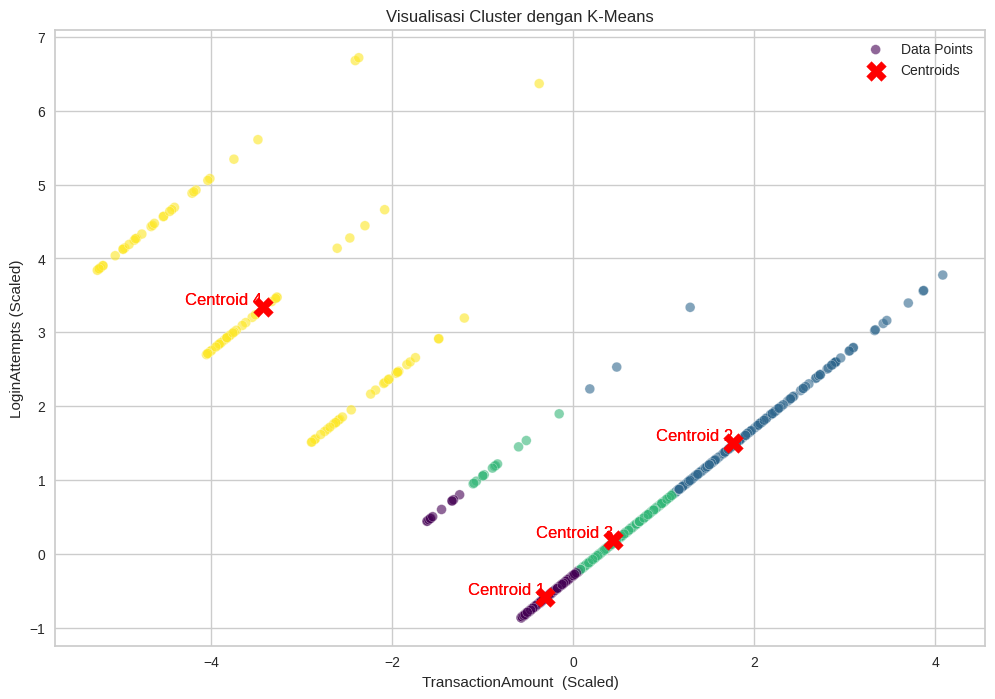

In [1055]:
# 8. Clustering menggunakan K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_pca)
df_pca['Cluster'] = kmeans.labels_

# 9. Menambahkan kembali hasil clustering ke dataset asli
df_cleaned['Cluster'] = df_pca['Cluster']

# 10. Melakukan inverse transform pada fitur yang telah dinormalisasi
df_cleaned[numerical_cols] = scaler.inverse_transform(scaled_df)

# 11. Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label='Data Points')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

plt.xlabel('TransactionAmount  (Scaled)')
plt.ylabel('LoginAttempts (Scaled)')

plt.title('Visualisasi Cluster dengan K-Means')

plt.legend()

plt.show()



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [1057]:
df[ ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'] ]= scaler.inverse_transform(scaled_df)


In [1063]:
print(df_cleaned.dtypes)

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
Cluster                      int32
dtype: object


In [1060]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
clustering_results = df_cleaned.groupby('Cluster')[numerical_cols].mean()
print(clustering_results)

         TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0               111.464480    44.658120           119.866809       1.007835   
1               972.168496    44.085366           119.276423       1.012195   
2               424.583025    44.908735           117.835724       1.016949   
3               276.324316    44.536842           131.884211       4.010526   

         AccountBalance  Cluster  
Cluster                           
0           5193.224658      0.0  
1           5069.903699      1.0  
2           4941.055059      2.0  
3           5461.643053      3.0  


Tulis hasil interpretasinya di sini.
1. Cluster 0

  * Memiliki jumlah transaksi yang relatif kecil (TransactionAmount rata-rata 111.46).

  * Usia pelanggan sekitar 44.66 tahun.

  * Durasi transaksi sekitar 119.87 detik.

  * Saldo akun rata-rata 5193.22.

  * Login attempts rendah (~1).

2. Cluster 1

  * Jumlah transaksi lebih besar (TransactionAmount 424.58).

  * Usia pelanggan mirip dengan Cluster 0 (44.91 tahun).

  * Durasi transaksi sedikit lebih cepat (~117.83 detik).

  * Saldo akun sedikit lebih rendah (~4941.05).

  * Login attempts hampir sama (~1).

3. Cluster 2

  * Transaksi terbesar dibanding cluster lain (TransactionAmount 972.16).

  * Usia pelanggan lebih rendah dari cluster lain (~44.09).

  * Durasi transaksi hampir sama (~119.27 detik).

  * Saldo akun cukup tinggi (~5069.90).

  * Login attempts tetap rendah (~1).

4. Cluster 3

   * Transaksi menengah (TransactionAmount 276.32).

   * Usia pelanggan sedikit lebih rendah (~44.54).

   * Durasi transaksi paling lama (~131.88 detik).

   * Saldo akun tertinggi dibanding cluster lain (~5461.64).

   * Login attempts jauh lebih tinggi (~4) → Indikasi potensi aktivitas tidak biasa

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1066]:
df.to_csv('df_cluster.csv', index=False)